In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

## Step 1 : Reading and Understanding the Data

In [18]:
# Reading leads dataframe as lead_df
lead_df=pd.read_csv('Leads.csv') 
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [21]:
lead_df.shape

(9240, 37)


## Step : 2 Data Cleaning

In [22]:
# Replacing Select values with nan values
lead_df = lead_df.replace('Select', np.nan)

In [23]:
# Checking whether if there is any missing value.
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [24]:
# Checking for duplicates values
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##### Droping the Columns which has large number of "Missing Values"

In [25]:
# Removing columns whch column containd more than 40% of Missing Values
cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df=lead_df.drop(cols,axis=1)

In [26]:
# dropping 'Tags' as these features is derived by sales team
lead_df.drop('Tags',axis=1,inplace=True)

##### For catetogariacl variable finding the null Labels contains in the datafram and replace the nan value with most repeated category "Missing Values"

In [27]:
# Finding the null Labels contains in the datafram
null_counts = lead_df.isnull().sum().sort_values(ascending = False)
print(null_counts)

Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article           

In [28]:
# Finding the Labels contains in the Specialization Variable
lead_df['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [29]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Finance Management')

In [30]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [31]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
lead_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [32]:
# Finding the Labels contains in the "What is your current occupation" Variable
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [34]:
# Finding the Labels contains in the Country Variable
lead_df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [35]:
# imputing  "India" as its common occurance in Country Column
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [36]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [37]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')

In [38]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [39]:
# imputing  "Google" as its common occurance in Lead Source Column
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')

In [40]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

In [41]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Outlier Detection for non catogarical varaibales 

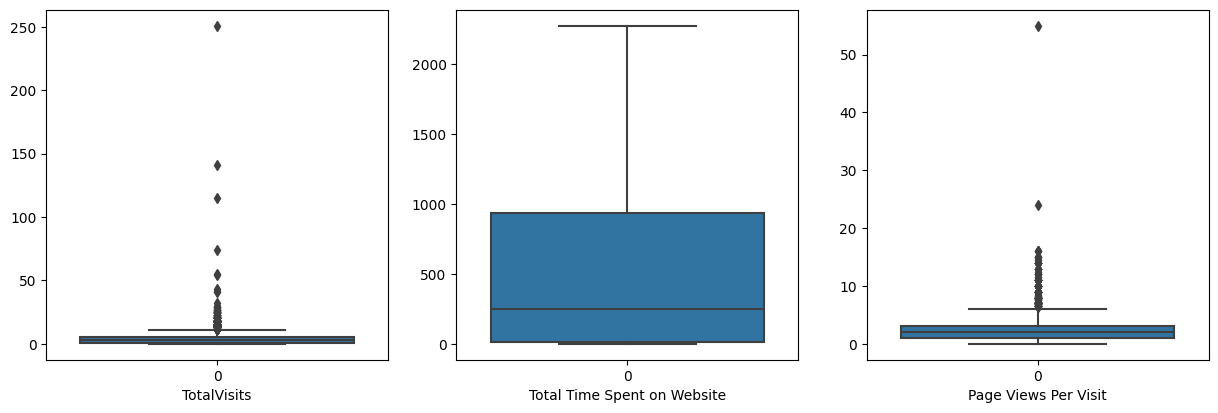

In [42]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead_df['TotalVisits'])
plt.xlabel('TotalVisits')
plt.subplot(2,3,2)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.subplot(2,3,3)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')
plt.show()


Outliers are Present in both the Variables ``TotalVisits`` and ``Page Views Per Visit`` it should be treated 
and the value spreaded above median highly in ``Total Time Spent on Website``

Imputing ```Median``` to the Misssing values

In [43]:
# Imputing Median as it is a Continueous type
lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

### After above excercie checking the Null Values

In [44]:
# Finding the null Labels contains in the datafram after the imputation 
null_counts = lead_df.isnull().sum().sort_values(ascending = False)
print(null_counts)

Prospect ID                                 0
Search                                      0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
What is your current occupation             0
Lead Number                                 0
Specialization                              0
Country                                     0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                         

No Null Values are remaining in the dataset

In [45]:
# making lead number as index and drop Prospect ID 
lead_df=lead_df.set_index('Lead Number')
lead_df.drop(['Prospect ID'],axis=1,inplace=True)

In [46]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj = list(lead_df.loc[:, lead_df.dtypes == object].columns)
col_num = list(lead_df.select_dtypes(include=[np.number]).columns)

print('Columns with object dtype \n{} \n\nColumns with number dtype \n{}'.format(col_obj, col_num))

Columns with object dtype 
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 

Columns with number dtype 
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


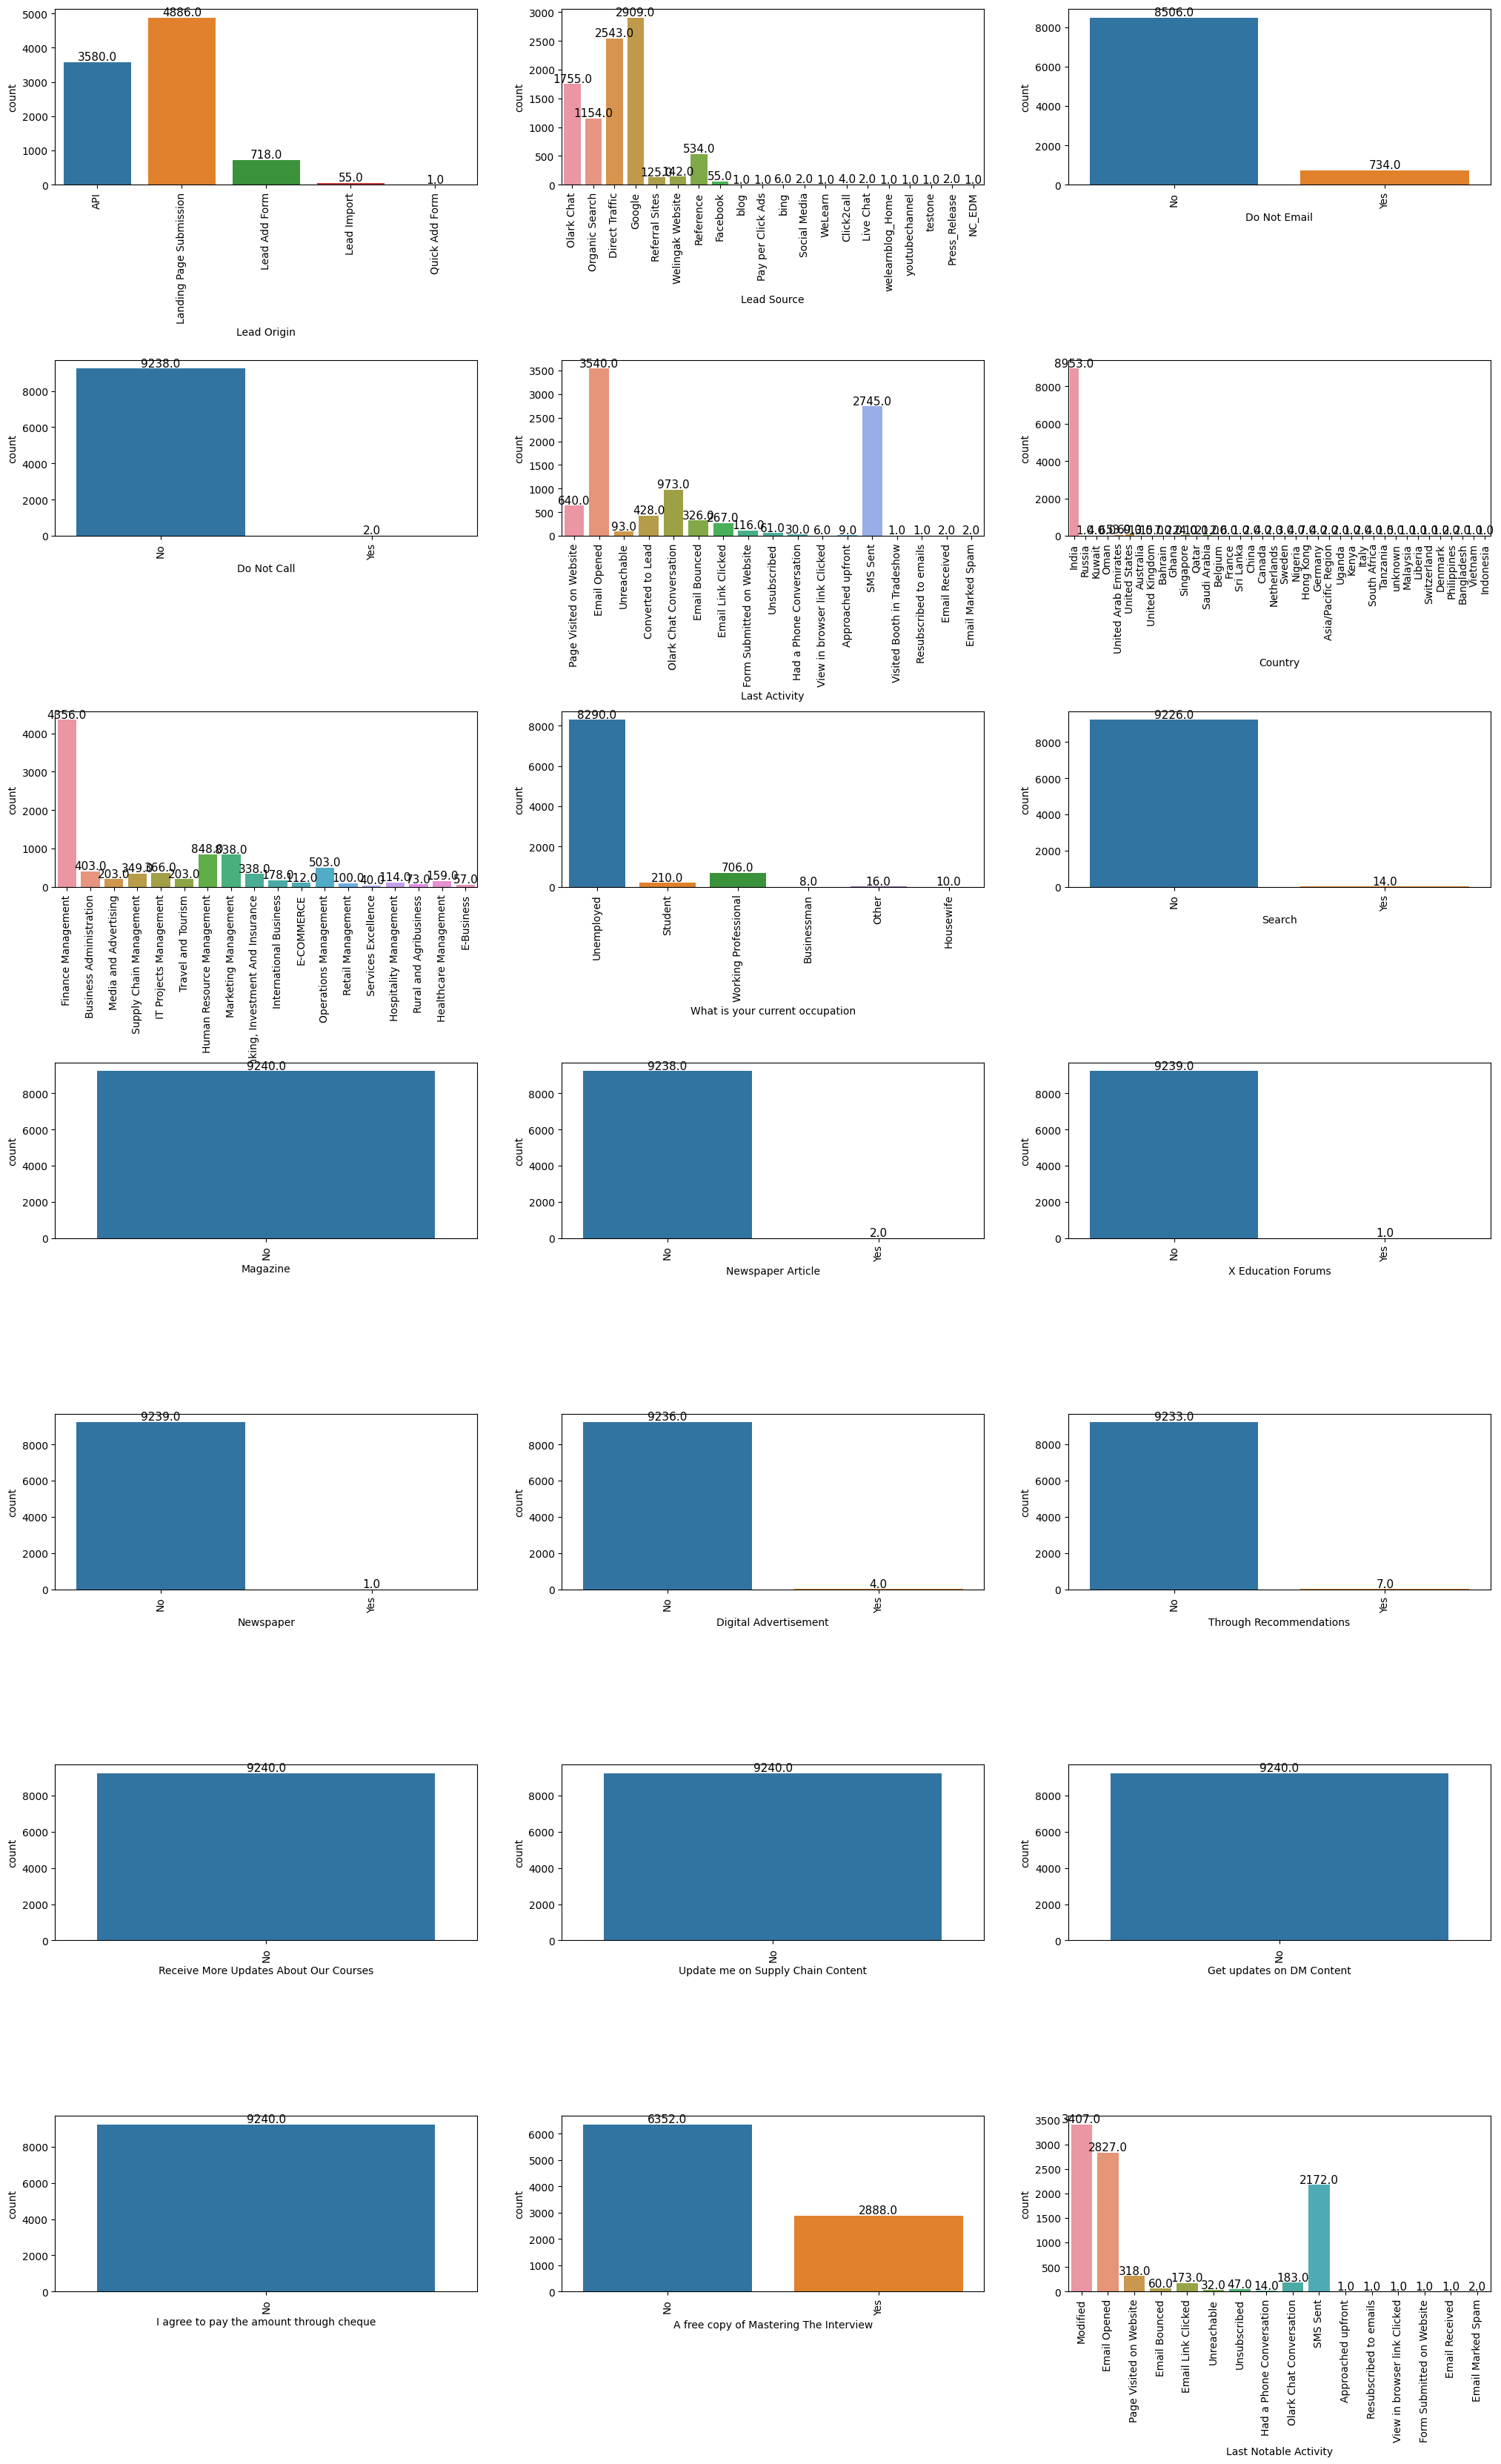

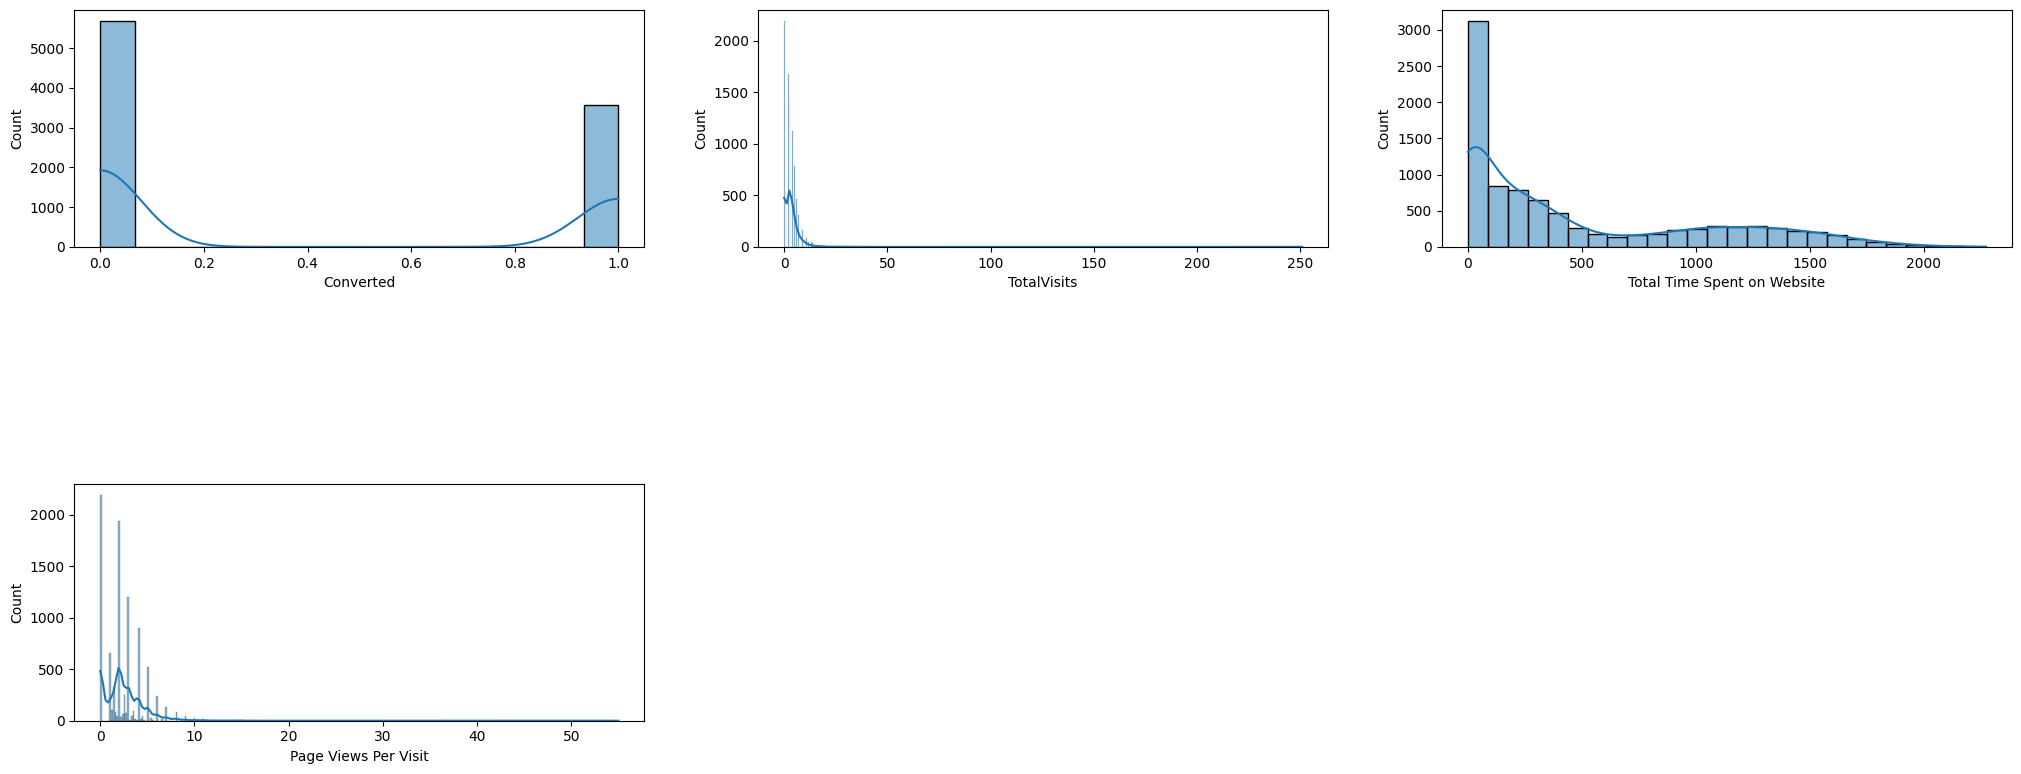

In [47]:
# plotting countplot for:-  object dtype  and  
# histogram for:-  number to get data distribution
plt.figure(figsize=(25, 40))
plt.subplots_adjust(wspace=.2, hspace=1)

# Plotting count plots for object dtype columns
for i, col in enumerate(col_obj):
    plt.subplot(7, 3, i + 1)
    ax = sns.countplot(x=col, data=lead_df)
    plt.xticks(rotation=90)
    
    # Adding labels on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

# Plotting histograms for numeric dtype columns
plt.figure(figsize=(25, 40))
plt.subplots_adjust(wspace=.2, hspace=1)

for i, col in enumerate(col_num):
    plt.subplot(7, 3, i + 1)
    sns.histplot(lead_df[col], kde=True)
    plt.xlabel(col)

plt.show()

#### Obervations 
- From the above graph we can observed that there are many colums which are highly skewed or only one sided variables i.e 'Magazine'... We can remove these colums as this will not help in model building.
 
- There are cloumns which have many categories(>5), here we can impute  new value 'Other' for which are occured less.

Removing Highly Skewed variables and if Column contains Single Labels

In [48]:
# Taking care of highly skewed columns  and one value only
lead_df=lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],axis=1)

In [49]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
# Dropping specified columns
lead_df = lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                        'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

# Updating the list of object dtype columns
col_obj = lead_df.loc[:, lead_df.dtypes == object].columns

Since in other columns we have multipale type of category out of which we club small category in to other category so that our analysis is more powerfull 

In [50]:
lead_df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [51]:
# changing categories which are occured less than 1000
col_dict_ls=dict(lead_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_df['Lead Source']=lead_df['Lead Source'].replace(i,'Other')

In [52]:
lead_df['Lead Source'].value_counts()

Lead Source
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Other              879
Name: count, dtype: int64

In [53]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [54]:
# Changing categories which are occured less than 300
col_dict_la=dict(lead_df['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead_df['Last Activity']=lead_df['Last Activity'].replace(i,'Other')

In [55]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened               3540
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Other                       588
Converted to Lead           428
Email Bounced               326
Name: count, dtype: int64

In [56]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [57]:
# Changing categories which are occured less than 500
col_dict_lna=dict(lead_df['Last Notable Activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead_df['Last Notable Activity']=lead_df['Last Notable Activity'].replace(i,'Other')

In [58]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: count, dtype: int64

In [59]:
lead_df['Specialization'].value_counts()

Specialization
Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [60]:
# Changing categories which are occured less than 350
col_dict_spec=dict(lead_df['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        lead_df['Specialization']=lead_df['Specialization'].replace(i,'Other')

In [61]:
lead_df['Specialization'].value_counts()

Specialization
Finance Management           4356
Other                        1926
Human Resource Management     848
Marketing Management          838
Operations Management         503
Business Administration       403
IT Projects Management        366
Name: count, dtype: int64

## Step : 3 Exploratory Data Analysis

#### Univariate Analysis (Categorical)

In [62]:
#Checking the numbers of columns and after removing non required columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 794.1+ KB

In [63]:
# Creating a list of columns which contains only categorical variables
cols = lead_df.select_dtypes(include=['object', 'category']).columns
print(cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


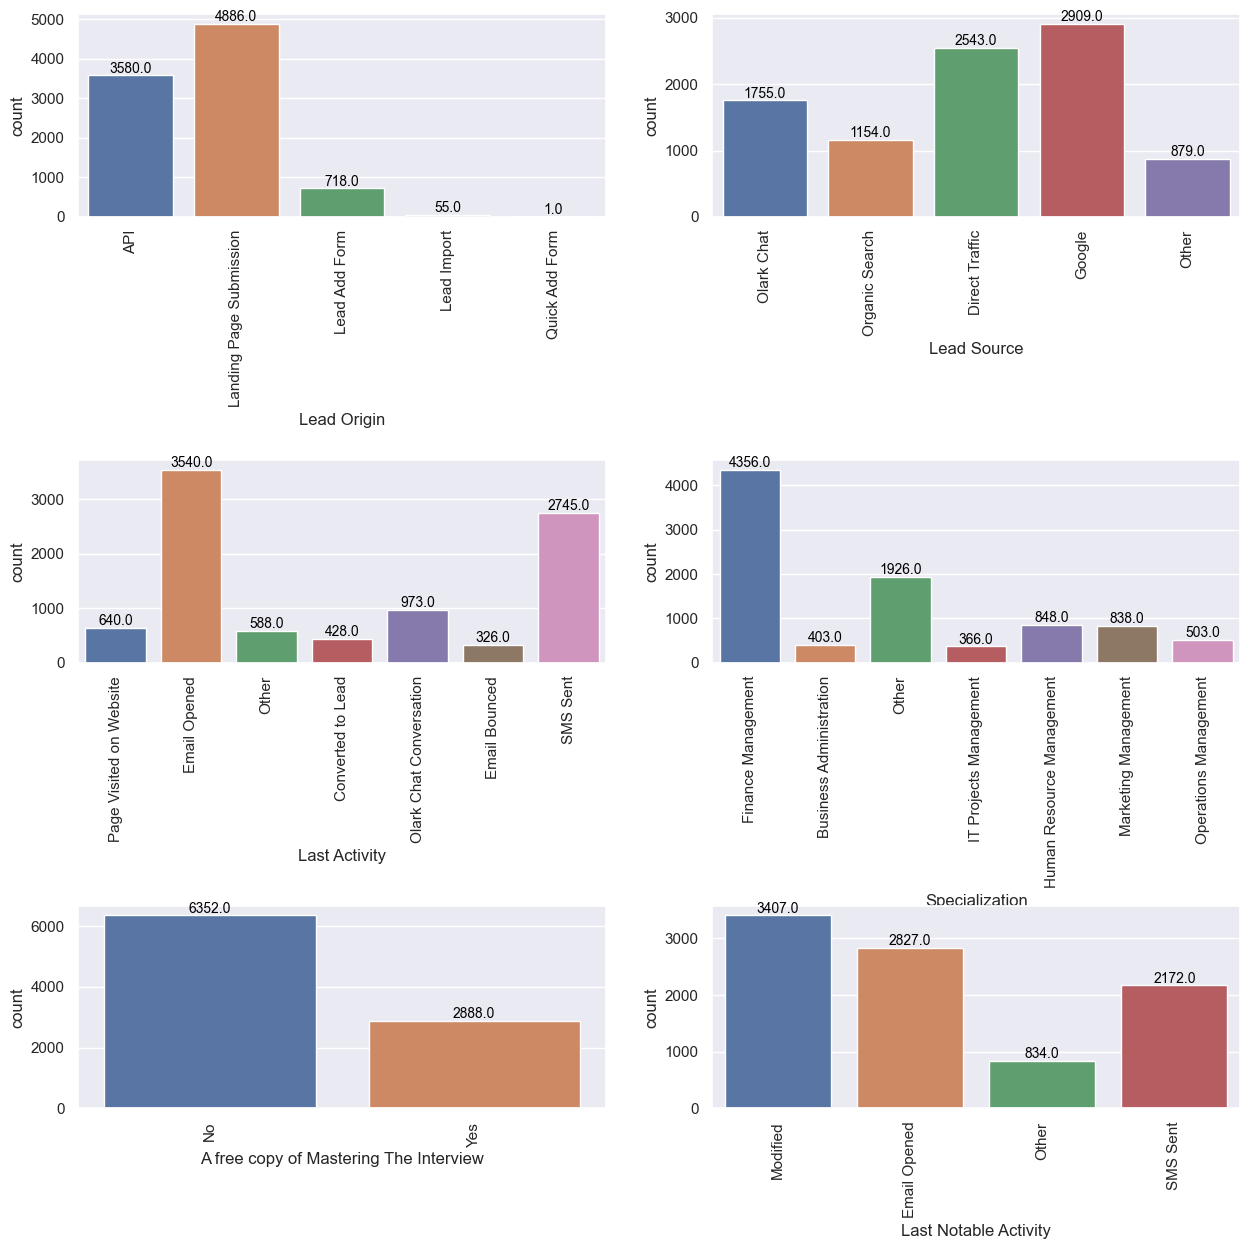

In [64]:
# Adjust figure size
plt.figure(figsize=(15, 20))
sns.set()
plt.subplots_adjust(wspace=.2, hspace=1.2)

# Plotting count plots for categorical columns
for i, col in enumerate(col_obj):
    plt.subplot(4, 2, i + 1)
    ax = sns.countplot(x=col, data=lead_df)
    plt.xticks(rotation=90)
    
    # Adding labels on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

#### Obervations  :-
    - In Lead Source "Direct Traffic" and "Google" are the two main source for Leads
    - The Number of values is High in "Email Opened" and "SMS Sent" in Last Activity
    - More number of the people chooses "Finance Management" Specialization rather than "Other Specialization"
    - The "IT Project management" have very lees numbers so that most of the People not prefered this Specialization

#### Univariate Analysis(Contenious)

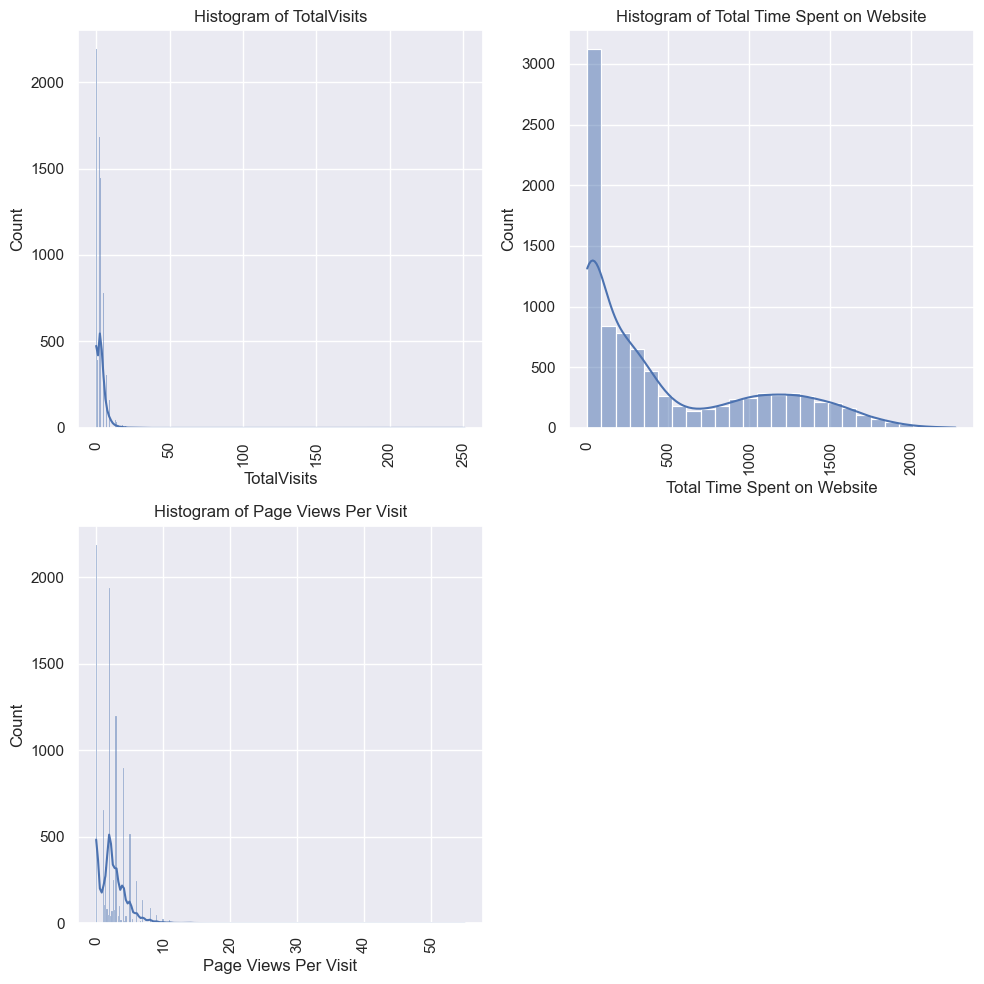

In [65]:
# Plotting univariate analysis for continuous variables
# Ensure 'Converted' is not in the list of columns for plotting
if 'Converted' in col_num:
    col_num.remove('Converted')

# Plotting univariate analysis for continuous variables
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=.02, hspace=0.4, wspace=0.3)

for i, col in enumerate(col_num):
    plt.subplot(2, 2, i + 1)
    sns.histplot(lead_df[col], kde=True)  # Use histplot with kde=True for density plot
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Observations :-
- There is no Normal distribution on Continueous Variables
- Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-10

### Bivariate Analysis

Bivariate Analysis with to Target Column ```Converted```

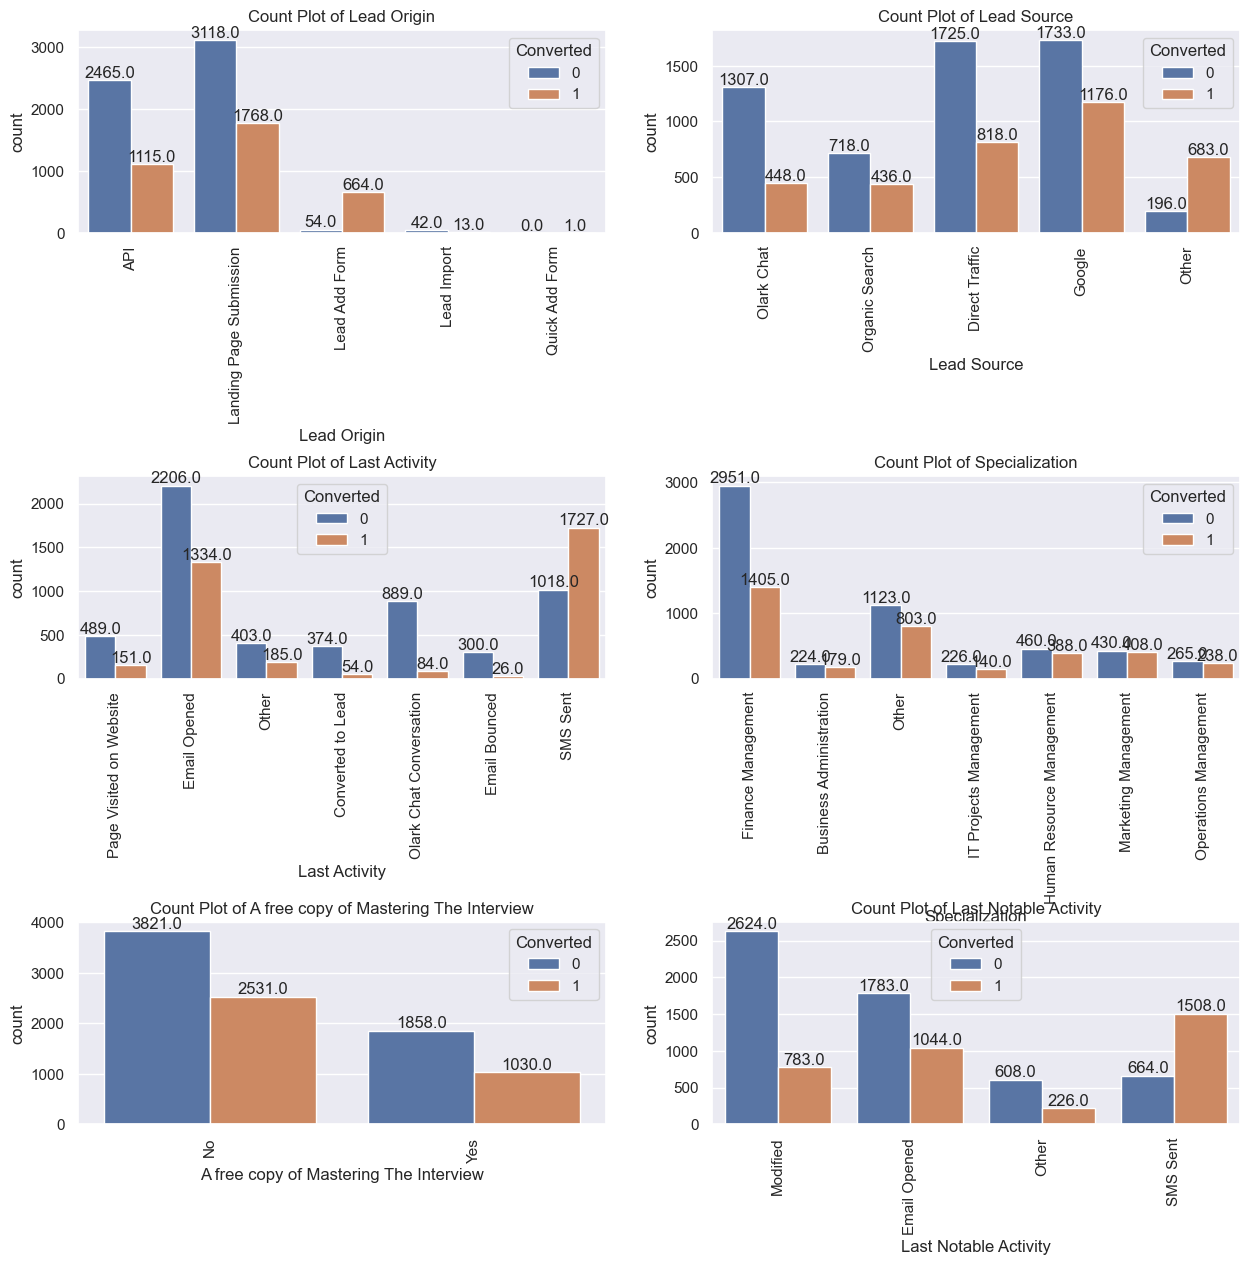

In [66]:
# Plotting bivariate analysis for categorical variables with hue
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=.2, hspace=1.2)

for i, col in enumerate(col_obj):
    plt.subplot(4, 2, i + 1)
    ax = sns.countplot(x=col, hue='Converted', data=lead_df)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of {col}')
    
    # Add labels on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Save the plot if needed
# plt.savefig('cate_bivar.png', dpi=300, transparent=True)

plt.show()

#### Observations :-
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

## Step : 4 Data Preparation for Preparation for Logistic Regression 

In [67]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [68]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 794.1+ KB

In [69]:
# mapping of columns
lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [70]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: count, dtype: int64

In [71]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened               3540
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Other                       588
Converted to Lead           428
Email Bounced               326
Name: count, dtype: int64

In [72]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
lead_df.drop('Last Notable Activity',axis=1,inplace=True)

In [73]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 721.9+ KB


#### 4.1 Creating dummies of Categorical Variables

In [74]:
dummies_df=pd.get_dummies(lead_df,drop_first=True, dtype='int')
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### 4.2 Splitting the Data into Training and Testing Sets

In [75]:
dummies_df.shape

(9240, 25)

In [76]:
#y to contain only target variable
y=dummies_df[['Converted']]


#X is all remainign variable also our independent variables
X=dummies_df.iloc[:,1:]

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
#Inspect independent variables
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
660727,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
660681,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [141]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(6468, 24)
(2772, 24)


#### 4.3 Feature Scaling continuous variables

In [142]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

#### 4.4 Looking at Correlations

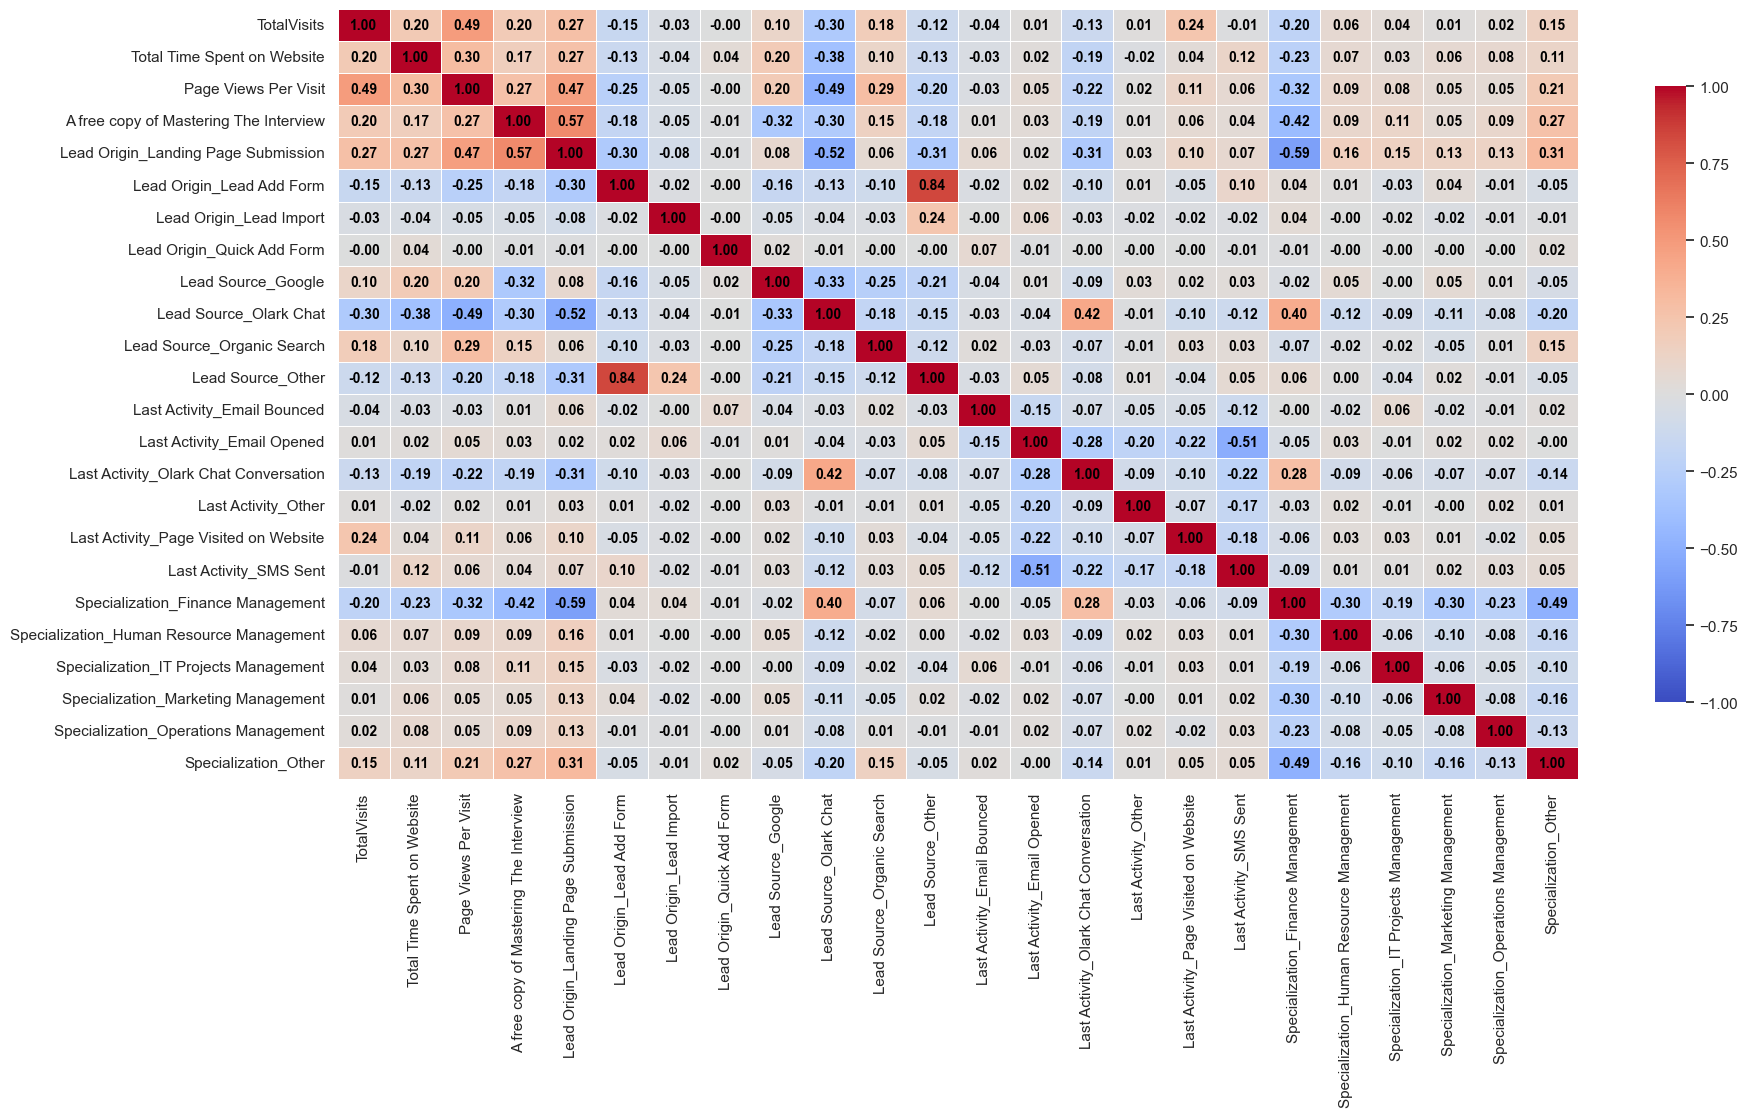

In [143]:
# Create the correlation matrix
corr_matrix = X_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap without annotations
ax = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar_kws={'shrink': .8}, vmin=-1, vmax=1, linewidths=0.5, linecolor='white')

# Loop over the data to add annotations manually
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        text = ax.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black', fontsize=10,weight='bold')

# Show the plot
plt.show()

- There are some columns are highly correlated
- We will use RFE to decide to drop columns or not

In [144]:
# Using rfe for features selection
logreg=LogisticRegression()

In [145]:
# Assuming logreg is already defined as a Logistic Regression model
logreg = LogisticRegression()

# Running RFE with the output number of the variable equal to 20
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Running RFE
rfe = rfe.fit(X_train, y_train)

In [146]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False])

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_IT Projects Management', False, 4),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', Fal

In [148]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Marketing Management'],
      dtype='object')

In [149]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Operations Management', 'Specialization_Other'],
      dtype='object')

## Step 5:  Building a Logistic Regression Model

#### Model 1

In [150]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.4
Date:                Tue, 23 Jul 2024   Deviance:                       5898.8
Time:                        22:30:38   Pearson chi2:                 6.63e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3430
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.8687      0.232     -8.046      0.000      -2.324      -1.413
TotalVisits                                0.2021      0.058      3.514      0.000       0.089       0.315
Total Time Spent on Website                1.0762      0.038     28.450      0.000       1.002       1.150
Page Views Per Visit                      -0.2137      0.051     -4.178      0.000      -0.314      -0.113
A free copy of Mastering The Interview    -0.1630      0.099     -1.654      0.098      -0.356       0.030
Lead Origin_Landing Page Submission       -0.3470      0.109     -3.188      0.001      -0.560      -0.134
Lead Origin_Lead Add Form                  3.4292      0.298     11.519      0.000       2.846       4.013
Lead Origin_Lead Import                   -0.3383      0.508     -0.666      0.506      -1.334       0.658
Lead Origin_Quick Add Form                19.6039   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                         0.2879      0.105      2.745      0.006       0.082       0.493
Lead Source_Olark Chat                     1.0393      0.150      6.935      0.000       0.746       1.333
Lead Source_Organic Search                 0.2660      0.118      2.245      0.025       0.034       0.498
Lead Source_Other                          0.4246      0.261      1.626      0.104      -0.087       0.936
Last Activity_Email Bounced               -0.8670      0.358     -2.424      0.015      -1.568      -0.166
Last Activity_Email Opened                 1.1166      0.201      5.545      0.000       0.722       1.511
Last Activity_Olark Chat Conversation     -0.3771      0.246     -1.532      0.126      -0.859       0.105
Last Activity_Other                        0.9448      0.233      4.052      0.000       0.488       1.402
Last Activity_Page Visited on Website      0.4960      0.237      2.091      0.037       0.031       0.961
Last Activity_SMS Sent                     2.2672      0.203     11.180      0.000       1.870       2.665
Specialization_Finance Management         -0.6018      0.088     -6.844      0.000      -0.774      -0.429
Specialization_Marketing Management        0.2395      0.115      2.089      0.037       0.015       0.464
==========================================================================================================
"""

In [151]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [152]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
11,Lead Source_Other,5.28
13,Last Activity_Email Opened,5.15
4,Lead Origin_Landing Page Submission,4.97
5,Lead Origin_Lead Add Form,4.81
17,Last Activity_SMS Sent,4.22
9,Lead Source_Olark Chat,3.70
18,Specialization_Finance Management,2.88
3,A free copy of Mastering The Interview,2.87
8,Lead Source_Google,2.86
14,Last Activity_Olark Chat Conversation,2.48


`Lead Origin_Quick Add Form` is insignificant because it has high p-value , so it should be dropped

In [153]:
col=col.drop('Lead Origin_Quick Add Form',1)

### Model 2

In [154]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.7
Date:                Tue, 23 Jul 2024   Deviance:                       5899.5
Time:                        22:30:39   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.8672      0.232     -8.039      0.000      -2.322      -1.412
TotalVisits                                0.2021      0.058      3.513      0.000       0.089       0.315
Total Time Spent on Website                1.0772      0.038     28.491      0.000       1.003       1.151
Page Views Per Visit                      -0.2138      0.051     -4.179      0.000      -0.314      -0.114
A free copy of Mastering The Interview    -0.1628      0.099     -1.652      0.099      -0.356       0.030
Lead Origin_Landing Page Submission       -0.3494      0.109     -3.212      0.001      -0.563      -0.136
Lead Origin_Lead Add Form                  3.4273      0.298     11.515      0.000       2.844       4.011
Lead Origin_Lead Import                   -0.3396      0.508     -0.668      0.504      -1.335       0.656
Lead Source_Google                         0.2885      0.105      2.751      0.006       0.083       0.494
Lead Source_Olark Chat                     1.0393      0.150      6.934      0.000       0.746       1.333
Lead Source_Organic Search                 0.2655      0.118      2.241      0.025       0.033       0.498
Lead Source_Other                          0.4253      0.261      1.629      0.103      -0.086       0.937
Last Activity_Email Bounced               -0.8425      0.353     -2.383      0.017      -1.535      -0.150
Last Activity_Email Opened                 1.1169      0.201      5.545      0.000       0.722       1.512
Last Activity_Olark Chat Conversation     -0.3769      0.246     -1.531      0.126      -0.859       0.106
Last Activity_Other                        0.9452      0.233      4.053      0.000       0.488       1.402
Last Activity_Page Visited on Website      0.4962      0.237      2.092      0.036       0.031       0.961
Last Activity_SMS Sent                     2.2678      0.203     11.180      0.000       1.870       2.665
Specialization_Finance Management         -0.6035      0.088     -6.865      0.000      -0.776      -0.431
Specialization_Marketing Management        0.2387      0.115      2.082      0.037       0.014       0.463
==========================================================================================================
"""

In [155]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
10,Lead Source_Other,5.28
12,Last Activity_Email Opened,5.15
4,Lead Origin_Landing Page Submission,4.97
5,Lead Origin_Lead Add Form,4.81
16,Last Activity_SMS Sent,4.22
8,Lead Source_Olark Chat,3.70
3,A free copy of Mastering The Interview,2.87
17,Specialization_Finance Management,2.87
7,Lead Source_Google,2.85
13,Last Activity_Olark Chat Conversation,2.48


`Lead Origin_Lead Import` is insignificant because it has high p-value , so it should be dropped

In [156]:
col=col.drop('Lead Origin_Lead Import',1)

### Model 3

In [157]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.0
Date:                Tue, 23 Jul 2024   Deviance:                       5899.9
Time:                        22:30:40   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.8684      0.232     -8.043      0.000      -2.324      -1.413
TotalVisits                                0.2030      0.058      3.525      0.000       0.090       0.316
Total Time Spent on Website                1.0782      0.038     28.536      0.000       1.004       1.152
Page Views Per Visit                      -0.2116      0.051     -4.146      0.000      -0.312      -0.112
A free copy of Mastering The Interview    -0.1617      0.099     -1.641      0.101      -0.355       0.031
Lead Origin_Landing Page Submission       -0.3458      0.109     -3.182      0.001      -0.559      -0.133
Lead Origin_Lead Add Form                  3.5085      0.274     12.788      0.000       2.971       4.046
Lead Source_Google                         0.2892      0.105      2.757      0.006       0.084       0.495
Lead Source_Olark Chat                     1.0468      0.150      7.001      0.000       0.754       1.340
Lead Source_Organic Search                 0.2653      0.119      2.238      0.025       0.033       0.498
Lead Source_Other                          0.3467      0.236      1.470      0.142      -0.116       0.809
Last Activity_Email Bounced               -0.8511      0.354     -2.406      0.016      -1.544      -0.158
Last Activity_Email Opened                 1.1118      0.201      5.523      0.000       0.717       1.506
Last Activity_Olark Chat Conversation     -0.3788      0.246     -1.539      0.124      -0.861       0.104
Last Activity_Other                        0.9428      0.233      4.042      0.000       0.486       1.400
Last Activity_Page Visited on Website      0.4923      0.237      2.075      0.038       0.027       0.957
Last Activity_SMS Sent                     2.2627      0.203     11.161      0.000       1.865       2.660
Specialization_Finance Management         -0.6016      0.088     -6.850      0.000      -0.774      -0.429
Specialization_Marketing Management        0.2400      0.115      2.094      0.036       0.015       0.465
==========================================================================================================
"""

In [158]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
11,Last Activity_Email Opened,5.12
4,Lead Origin_Landing Page Submission,4.96
9,Lead Source_Other,4.27
15,Last Activity_SMS Sent,4.21
5,Lead Origin_Lead Add Form,3.92
7,Lead Source_Olark Chat,3.68
3,A free copy of Mastering The Interview,2.87
16,Specialization_Finance Management,2.87
6,Lead Source_Google,2.85
12,Last Activity_Olark Chat Conversation,2.48


`Lead Source_Other` is insignificant because it has high p-value , so it should be dropped

In [159]:
col=col.drop('Lead Source_Other',1)

### Model 4

In [160]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.0
Date:                Tue, 23 Jul 2024   Deviance:                       5902.0
Time:                        22:30:40   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3426
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.8006      0.227     -7.916      0.000      -2.246      -1.355
TotalVisits                                0.2032      0.058      3.524      0.000       0.090       0.316
Total Time Spent on Website                1.0748      0.038     28.523      0.000       1.001       1.149
Page Views Per Visit                      -0.2085      0.051     -4.088      0.000      -0.309      -0.109
A free copy of Mastering The Interview    -0.1852      0.097     -1.906      0.057      -0.376       0.005
Lead Origin_Landing Page Submission       -0.3757      0.107     -3.520      0.000      -0.585      -0.167
Lead Origin_Lead Add Form                  3.7675      0.214     17.618      0.000       3.348       4.187
Lead Source_Google                         0.2389      0.099      2.411      0.016       0.045       0.433
Lead Source_Olark Chat                     0.9784      0.142      6.896      0.000       0.700       1.257
Lead Source_Organic Search                 0.2253      0.115      1.954      0.051      -0.001       0.451
Last Activity_Email Bounced               -0.8671      0.355     -2.443      0.015      -1.563      -0.171
Last Activity_Email Opened                 1.1179      0.201      5.556      0.000       0.724       1.512
Last Activity_Olark Chat Conversation     -0.3726      0.246     -1.514      0.130      -0.855       0.110
Last Activity_Other                        0.9512      0.233      4.081      0.000       0.494       1.408
Last Activity_Page Visited on Website      0.4927      0.237      2.077      0.038       0.028       0.958
Last Activity_SMS Sent                     2.2627      0.203     11.165      0.000       1.865       2.660
Specialization_Finance Management         -0.6041      0.088     -6.879      0.000      -0.776      -0.432
Specialization_Marketing Management        0.2371      0.114      2.071      0.038       0.013       0.461
==========================================================================================================
"""

In [161]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,4.89
10,Last Activity_Email Opened,4.64
14,Last Activity_SMS Sent,3.93
7,Lead Source_Olark Chat,3.39
15,Specialization_Finance Management,2.86
3,A free copy of Mastering The Interview,2.83
6,Lead Source_Google,2.60
11,Last Activity_Olark Chat Conversation,2.36
2,Page Views Per Visit,1.91
5,Lead Origin_Lead Add Form,1.77


`Last Activity_Olark Chat Conversation` is insignificant because it has high p-value , so it should be dropped

In [162]:
col=col.drop('Last Activity_Olark Chat Conversation',1)

### Model 5

In [163]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.1
Date:                Tue, 23 Jul 2024   Deviance:                       5904.3
Time:                        22:31:00   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3424
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0373      0.171    -11.927      0.000      -2.372      -1.703
TotalVisits                                0.1970      0.057      3.451      0.001       0.085       0.309
Total Time Spent on Website                1.0758      0.038     28.517      0.000       1.002       1.150
Page Views Per Visit                      -0.2141      0.051     -4.205      0.000      -0.314      -0.114
A free copy of Mastering The Interview    -0.1877      0.097     -1.930      0.054      -0.378       0.003
Lead Origin_Landing Page Submission       -0.3719      0.107     -3.481      0.000      -0.581      -0.162
Lead Origin_Lead Add Form                  3.7534      0.214     17.573      0.000       3.335       4.172
Lead Source_Google                         0.2359      0.099      2.379      0.017       0.042       0.430
Lead Source_Olark Chat                     0.9431      0.140      6.746      0.000       0.669       1.217
Lead Source_Organic Search                 0.2324      0.115      2.014      0.044       0.006       0.459
Last Activity_Email Bounced               -0.6276      0.320     -1.959      0.050      -1.256       0.000
Last Activity_Email Opened                 1.3629      0.127     10.766      0.000       1.115       1.611
Last Activity_Other                        1.1963      0.173      6.924      0.000       0.858       1.535
Last Activity_Page Visited on Website      0.7370      0.179      4.127      0.000       0.387       1.087
Last Activity_SMS Sent                     2.5066      0.130     19.289      0.000       2.252       2.761
Specialization_Finance Management         -0.6085      0.088     -6.927      0.000      -0.781      -0.436
Specialization_Marketing Management        0.2399      0.115      2.094      0.036       0.015       0.464
==========================================================================================================
"""

In [164]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,4.38
10,Last Activity_Email Opened,2.94
3,A free copy of Mastering The Interview,2.73
13,Last Activity_SMS Sent,2.65
14,Specialization_Finance Management,2.46
7,Lead Source_Olark Chat,2.34
6,Lead Source_Google,2.27
2,Page Views Per Visit,1.91
5,Lead Origin_Lead Add Form,1.59
12,Last Activity_Page Visited on Website,1.44


`A free copy of Mastering The Interview	` is insignificant because it has high p-value , so it should be dropped

In [165]:
col=col.drop('A free copy of Mastering The Interview',1)

### Model 6

In [166]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.0
Date:                Tue, 23 Jul 2024   Deviance:                       5908.0
Time:                        22:31:00   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3420
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.1290      0.164    -12.949      0.000      -2.451      -1.807
TotalVisits                               0.1906      0.057      3.371      0.001       0.080       0.301
Total Time Spent on Website               1.0731      0.038     28.489      0.000       0.999       1.147
Page Views Per Visit                     -0.2118      0.051     -4.165      0.000      -0.311      -0.112
Lead Origin_Landing Page Submission      -0.4271      0.103     -4.147      0.000      -0.629      -0.225
Lead Origin_Lead Add Form                 3.8196      0.211     18.102      0.000       3.406       4.233
Lead Source_Google                        0.3337      0.085      3.906      0.000       0.166       0.501
Lead Source_Olark Chat                    1.0056      0.136      7.374      0.000       0.738       1.273
Lead Source_Organic Search                0.2567      0.115      2.239      0.025       0.032       0.481
Last Activity_Email Bounced              -0.6113      0.321     -1.905      0.057      -1.240       0.018
Last Activity_Email Opened                1.3613      0.127     10.752      0.000       1.113       1.609
Last Activity_Other                       1.1942      0.173      6.912      0.000       0.856       1.533
Last Activity_Page Visited on Website     0.7445      0.178      4.172      0.000       0.395       1.094
Last Activity_SMS Sent                    2.5048      0.130     19.273      0.000       2.250       2.759
Specialization_Finance Management        -0.5863      0.087     -6.740      0.000      -0.757      -0.416
Specialization_Marketing Management       0.2476      0.114      2.165      0.030       0.023       0.472
=========================================================================================================
"""

In [167]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.12
9,Last Activity_Email Opened,2.83
12,Last Activity_SMS Sent,2.57
13,Specialization_Finance Management,2.46
6,Lead Source_Olark Chat,2.33
2,Page Views Per Visit,1.91
5,Lead Source_Google,1.88
4,Lead Origin_Lead Add Form,1.57
11,Last Activity_Page Visited on Website,1.43
0,TotalVisits,1.39


`Last Activity_Email Bounced	` is insignificant because it has high p-value , so it should be dropped

In [168]:
col=col.drop('Last Activity_Email Bounced',1)

### Model 7

In [169]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.0
Date:                Tue, 23 Jul 2024   Deviance:                       5912.0
Time:                        22:31:01   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3416
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2189      0.160    -13.911      0.000      -2.532      -1.906
TotalVisits                               0.1919      0.057      3.389      0.001       0.081       0.303
Total Time Spent on Website               1.0723      0.038     28.484      0.000       0.999       1.146
Page Views Per Visit                     -0.2112      0.051     -4.155      0.000      -0.311      -0.112
Lead Origin_Landing Page Submission      -0.4366      0.103     -4.243      0.000      -0.638      -0.235
Lead Origin_Lead Add Form                 3.7953      0.210     18.045      0.000       3.383       4.207
Lead Source_Google                        0.3334      0.085      3.905      0.000       0.166       0.501
Lead Source_Olark Chat                    1.0124      0.136      7.423      0.000       0.745       1.280
Lead Source_Organic Search                0.2532      0.115      2.210      0.027       0.029       0.478
Last Activity_Email Opened                1.4559      0.119     12.197      0.000       1.222       1.690
Last Activity_Other                       1.2891      0.167      7.701      0.000       0.961       1.617
Last Activity_Page Visited on Website     0.8403      0.173      4.853      0.000       0.501       1.180
Last Activity_SMS Sent                    2.5999      0.123     21.173      0.000       2.359       2.841
Specialization_Finance Management        -0.5847      0.087     -6.726      0.000      -0.755      -0.414
Specialization_Marketing Management       0.2501      0.114      2.188      0.029       0.026       0.474
=========================================================================================================
"""

In [170]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,2.76
8,Last Activity_Email Opened,2.57
12,Specialization_Finance Management,2.41
11,Last Activity_SMS Sent,2.35
6,Lead Source_Olark Chat,2.31
2,Page Views Per Visit,1.91
5,Lead Source_Google,1.86
4,Lead Origin_Lead Add Form,1.54
0,TotalVisits,1.39
10,Last Activity_Page Visited on Website,1.38


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [171]:
# Assuming X_train and y_train are your training data and target variable
# Add a constant to the training data
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor

# Define and fit the logistic regression model
logm6 = sm.Logit(y_train, X_train_sm).fit()

# Predict on the training data
y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)


         Current function value: 0.455792
         Iterations: 35


D:\DATA SCIENCE AND AI\Anaconda Exe FIle\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [172]:
y_train_pred[:10]

array([0.23595582, 0.61696744, 0.46358923, 0.71592218, 0.7972139 ,
       0.06476913, 0.61954832, 0.32925367, 0.2288064 , 0.06476913])

In [173]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.235956,614587
1,1,0.616967,594769
2,0,0.463589,581700
3,0,0.715922,609249
4,0,0.797214,631017


In [174]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.235956,614587,0
1,1,0.616967,594769,1
2,0,0.463589,581700,0
3,0,0.715922,609249,1
4,0,0.797214,631017,1


In [175]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [176]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.7855596784168213, Sensitivity 0.6336553945249598, specitiy 0.8802710843373494


Here we got low Sensitivity when randomly take the Cutoff as 0.5

In [177]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3507,  477],
       [ 910, 1574]], dtype=int64)

In [178]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [179]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.1197289156626506


In [180]:
# positive predictive value 
print (TP / float(TP+FP))

0.7674305216967333


In [181]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7939778129952456


In [182]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [183]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

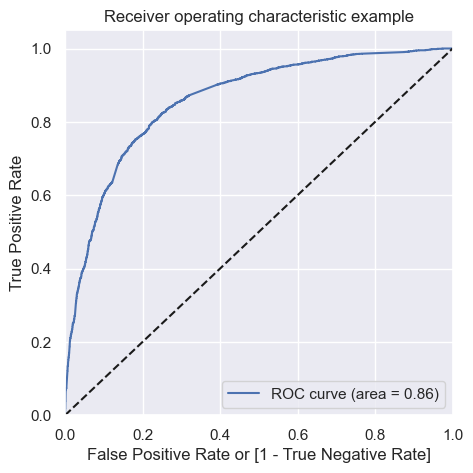

In [184]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal Point

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235956,614587,0,1,1,1,0,0,0,0,0,0,0
1,1,0.616967,594769,1,1,1,1,1,1,1,1,0,0,0
2,0,0.463589,581700,0,1,1,1,1,1,0,0,0,0,0
3,0,0.715922,609249,1,1,1,1,1,1,1,1,1,0,0
4,0,0.797214,631017,1,1,1,1,1,1,1,1,1,0,0


In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.565553  0.972222  0.311998
0.2   0.2  0.691868  0.917069  0.551456
0.3   0.3  0.773500  0.835346  0.734940
0.4   0.4  0.790971  0.754026  0.814006
0.5   0.5  0.785560  0.633655  0.880271
0.6   0.6  0.776283  0.555958  0.913655
0.7   0.7  0.752165  0.449275  0.941014
0.8   0.8  0.728046  0.346618  0.965863
0.9   0.9  0.680736  0.186795  0.988705


<Figure size 2000x1500 with 0 Axes>

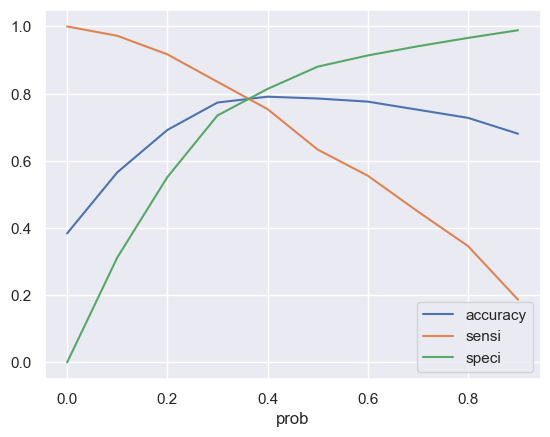

In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
# plt.savefig('acc_s_s_curve',dpi=300,transparent=True)
plt.show()

Taking value 3.7  as the Final Cutoff

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235956,614587,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.616967,594769,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.463589,581700,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.715922,609249,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.797214,631017,1,1,1,1,1,1,1,1,1,0,0,1


In [189]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7846320346320347, Sensitivity 0.7765700483091788, specifitiy 0.7896586345381527  


In [190]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3507,  477],
       [ 910, 1574]], dtype=int64)

In [191]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6971449222985182

In [192]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7765700483091788

In [193]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

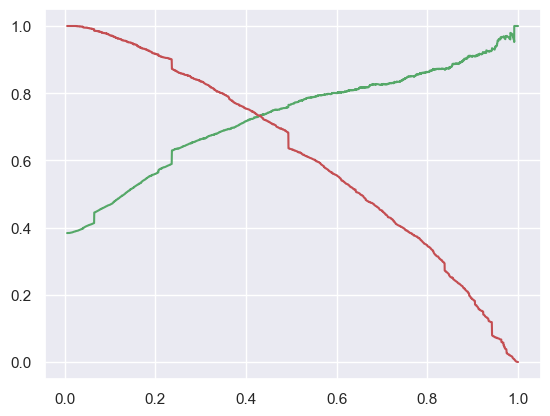

In [194]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
# plt.savefig('precision-recall_curve',dpi=300,transparent=True)
plt.show()

Here we got 0.37 as the Cut-off as Precesion-Recall Thresholdm

# Making Prediction on test set

Scaling on Test Set

In [195]:
scaler=StandardScaler()
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [209]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

In [210]:
X_test = X_test[X_train.columns]

In [212]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm6.predict(X_test_sm)
print(y_test_pred[:10])

Lead Number
615582    0.136399
588939    0.101264
621242    0.009611
589803    0.112606
651441    0.227647
650484    0.063632
657038    0.803711
649329    0.127755
587559    0.158435
643897    0.962157
dtype: float64


In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [214]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [215]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [216]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,615582,0.136399
1,0,588939,0.101264
2,0,621242,0.009611
3,0,589803,0.112606
4,0,651441,0.227647


In [218]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [219]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,615582,0.136399,0
1,0,588939,0.101264,0
2,0,621242,0.009611,0
3,0,589803,0.112606,0
4,0,651441,0.227647,0


In [221]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [222]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.8001443001443002, Sensitivity 0.7994428969359332, specitiy 0.800589970501475  


- We can see that our model is doing well in test set also
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted. 
- We can see that our     model is giving about .80 sensitivity.
- it means that 80 percent time our model is able to predict (actually)converted as (prdicited)converted.

### Assigning Lead Score in the data frame with respect to Lead Number

In [223]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [229]:
lead_scorer_df = pd.concat([df1, df2], ignore_index=True)

In [230]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [232]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',axis=1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,614587,23.60
1,594769,61.70
2,581700,46.36
3,609249,71.59
4,631017,79.72


- Got the Lead Score with respect to Lead Number

## Conclusion :-
- We have noted that the variables that important the most in the potential buyers are:
    - The total time spend on the Website.
    - Total number of visits.
    - When the lead source was:
        a. Google
        b. Direct traffic
        c. Organic search
        d. Olark Chat
    - When the last activity was:
        a. SMS
        b. Olark chat conversation
    - When the lead origin is Lead add format.